Notes du cours : <br> <br><br>
Regularization's goal is to reduce the overfitting and controle the error in order to get better performances. When the model doesn't generalize well, it is called overfitting<br>
It permits to generalize solutions. There are many kind of regularization. For instance in machine learning : euclidean, lasso (used when we have a lot of features), Dropout (deep learning). <br><br>


Using the validation set permits to tell us how the model fits on data already seen. When the score on the validation set stays the same, it's time to stop overfitting. The grid search is used to find the hyperparameter optimization.
<br>
Regularization modifies the function which is minimized but adding weights. 
It becomes Error+a*f(teta) with a : regularization rate.
When a=0 means that we don't take measures about this.
There are 2 types of regularization: L1 (Laplacian) and L2 ( Gauss loi normale).<br>
The L2 reg : augments the error function thanks to the weights in the neural network by addind 1/2* *lambda* *w^2. In L2 reg, the f(teta) = 1/2 w^2
<br>
The L1 reg : adds lambda * |weight|, L1 reg is more for litlle small dataset. For L1 reg, the f(teta) = |w|
<br> Generally the L2 reg is the most used

Max norm constraints goal is to reduce de teta 

<br><br>


Drop out consists in replacing by zero randomly weights in the neural network or setting a probability p to this neuron. In order to delete temporarily neurons by putting their weight at 0, and reactivate those during the testing of the model. 
Permits the network not to be dependant. THe action of putting as inactive some neurons
<br><br>


Gradient descent est le normal utilisé dans le backpropagation utilisé précédemment. Il prend tout le dataset mais peut se retrouver bloqué si l'on a pas de chance et qu'il entraine sur des données non représentatives. Le problème es tque le gradient descent est LENT et pas assez accurate. 
<br> 
Il existe deux solutions qui fonctionnent aléatoirement qui sont les suivantes : <br>

<li>Stochastic gradient descent prend une seule ligne du dataset pour s'entrainer à cchaque itération, dans laquelle l'erreur est dynamique ce qui est plus simple pour faire varier les paramètres. Mais ca peut prendre bcp de temps si on le fait sur un grand dataset. Intéressant quand il y a des redondance dans les data.

<li>Mini batch gradient descent est mieux pour un grand dataset. Il consiste à prendre une partie du dataset (minibatch) 
<br>

Ce qui est intéressant dans ces deux méthodes est que le fait de répéter l'entrainement permets de corriger les poids et le réseau à chaque epochs (itération) et donc de le rendre meilleur.

Quand la courbe complexe passe par tous les points du training set, cela menera avec de grandes chances à de l'overfitting car elle sera trop bien entrainée tandis que pour le modèle simple et général est plus généralisé et commun a toutes les valeurs.
Validation permets de corriger les poids en deep learning pour eviter overfitting
<br><br>
Pour combattre l'overfitting on utilise la regularization qui consiste à modifier une fonction multipliée à un lambda à l'erreur. la fonction dépend du poids et le lambda permets de pénaliser/atténuer les poids. Si lambda =0 on ne fait rien pour modifier l'erreur. <br><br>

Deux types de régularization : 
<li> L2 reg : incite à utiliser toutes les features plutot que certaines. ajoute à l'erreur 1/2 lambda * w^2 
<li> L1 reg : qui ajoute lambda *|w|. Permets de comprendre la contribution des features au résultat

<br><br>
Max Norm Constraint : a pour but d'empecher les poids de devenir trop grands.
<br><br>
Drop out : desactive la moitie (p=0.5) des neurones à chaque itération pour empecher le reseau de neurone de devenir dependant. On entraine avec des neurones en moins ce qui revient à entrainer avec des reseaux de neurones differents. ca permet de corriger le reseau a chaque iteration. dépend du hyperparametre p. En quelques sortes le drop out rassemble tous les réseaux crée lors des drop out. 

<br><br> NB : Uniform distribution => Tous les neurones sont égaux

<br> <br><br><br>
Ex 1 

In [22]:

import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb

In [23]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [24]:
print('Training X shape : {}'.format(train_data.shape))
print('Training Y shape : {}'.format(train_label.shape))
print('Testing X shape : {}'.format(test_data.shape))
print('Testing Y shape : {}'.format(test_label.shape))

Training X shape : (25000,)
Training Y shape : (25000,)
Testing X shape : (25000,)
Testing Y shape : (25000,)


<br><br>Ex 2

In [25]:
def  vectorize_sequences(sequences , dimension =10000):
  # Create  an all -zero  matrix  of  shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence  in  enumerate(sequences):
    results[i, sequence] = 1.   # set  specific  indices  of results[i] to 1s
  return  results


# Our  vectorized  training  data
x_train = vectorize_sequences(train_data)
# Our  vectorized  test  data
x_test = vectorize_sequences(test_data)
# Our  vectorized  labels
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [26]:
print('Training X shape : {}'.format(x_train.shape))
print('Training Y shape : {}'.format(y_train.shape))
print('Testing X shape : {}'.format(x_test.shape))
print('Testing Y shape : {}'.format(y_test.shape))

Training X shape : (25000, 10000)
Training Y shape : (25000,)
Testing X shape : (25000, 10000)
Testing Y shape : (25000,)


<br> ex 3 

In [31]:
original_model = models.Sequential([
    layers.Dense(16,activation='relu', input_shape=(10000,)),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')])

In [32]:
original_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='acc')

Ex 4 

In [33]:
smaller_model = models.Sequential([
    layers.Dense(4,activation='relu', input_shape=(10000,)),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid')])
smaller_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='acc')

Ex 5

In [34]:
original_hist = original_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=512)

Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.5442 - acc: 0.7421 - val_loss: 0.3584 - val_acc: 0.8650
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2693 - acc: 0.9095 - val_loss: 0.3103 - val_acc: 0.8741
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2041 - acc: 0.9301 - val_loss: 0.2975 - val_acc: 0.8806
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1602 - acc: 0.9458 - val_loss: 0.2959 - val_acc: 0.8839
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1391 - acc: 0.9520 - val_loss: 0.3167 - val_acc: 0.8787
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1199 - acc: 0.9597 - val_loss: 0.3486 - val_acc: 0.8713
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1088 - acc: 0.9635 - val_loss: 0.3694 - val_acc: 0.8695
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.0950 - a

Ex 6 

In [35]:
smaller_hist = smaller_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=512)

Epoch 1/20
49/49 [==============================] - 5s 88ms/step - loss: 0.6113 - acc: 0.7280 - val_loss: 0.4602 - val_acc: 0.8646
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4030 - acc: 0.8882 - val_loss: 0.3620 - val_acc: 0.8785
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3039 - acc: 0.9087 - val_loss: 0.3126 - val_acc: 0.8867
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2417 - acc: 0.9217 - val_loss: 0.2928 - val_acc: 0.8876
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2109 - acc: 0.9297 - val_loss: 0.2863 - val_acc: 0.8870
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1868 - acc: 0.9402 - val_loss: 0.2806 - val_acc: 0.8896
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1674 - acc: 0.9448 - val_loss: 0.2808 - val_acc: 0.8880
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1528 - a

In [42]:
original_v_loss = original_hist.history['val_loss']
original_train_loss = original_hist.history['loss']
smaller_v_loss = smaller_hist.history['val_loss']
smaller_train_loss = smaller_hist.history['loss']

Ex 8

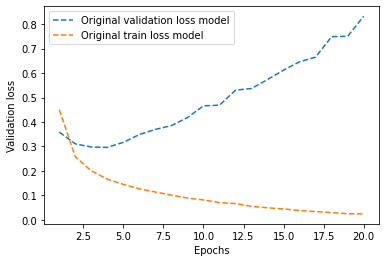

In [43]:
x_epoch=range(1,21)

plt.plot(x_epoch,original_v_loss, '--', label='Original validation loss model')
plt.plot(x_epoch,original_train_loss, '--', label='Original train loss model')


plt.ylabel('Original loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()


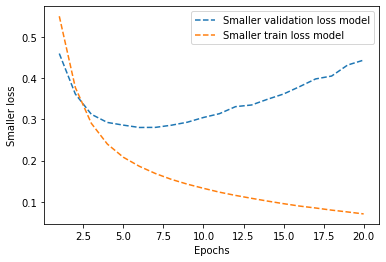

In [47]:
x_epoch=range(1,21)

plt.plot(x_epoch,smaller_v_loss, '--', label='Smaller validation loss model')
plt.plot(x_epoch,smaller_train_loss, '--', label='Smaller train loss model')


plt.ylabel('Smaller loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()


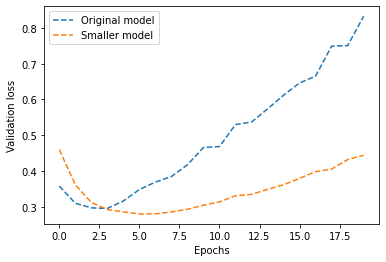

In [46]:
plt.plot(original_v_loss, '--', label='Original model')
plt.plot(smaller_v_loss, '--', label='Smaller model')

plt.ylabel('Validation loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()


In [ ]:
plt.plot(original_v_loss, '--', label='Original model')
plt.plot(smaller_v_loss, '--', label='Smaller model')


plt.ylabel('Validation loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()


Ex 9 

In [39]:
bigger_model = models.Sequential([
    layers.Dense(512,activation='relu', input_shape=(10000,)),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')])
bigger_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='acc')

Ex 10

In [41]:
bigger_hist = bigger_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=512)

Epoch 1/20
49/49 [==============================] - 19s 385ms/step - loss: 0.6035 - acc: 0.7034 - val_loss: 0.3075 - val_acc: 0.8678
Epoch 2/20
49/49 [==============================] - 15s 310ms/step - loss: 0.2223 - acc: 0.9113 - val_loss: 0.2987 - val_acc: 0.8787
Epoch 3/20
49/49 [==============================] - 15s 298ms/step - loss: 0.1199 - acc: 0.9570 - val_loss: 0.2961 - val_acc: 0.8842
Epoch 4/20
49/49 [==============================] - 15s 300ms/step - loss: 0.0510 - acc: 0.9870 - val_loss: 0.4501 - val_acc: 0.8700
Epoch 5/20
49/49 [==============================] - 15s 302ms/step - loss: 0.0482 - acc: 0.9902 - val_loss: 0.5108 - val_acc: 0.8825
Epoch 6/20
49/49 [==============================] - 15s 299ms/step - loss: 0.0151 - acc: 0.9982 - val_loss: 0.5392 - val_acc: 0.8695
Epoch 7/20
49/49 [==============================] - 15s 306ms/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.6899 - val_acc: 0.8813
Epoch 8/20
49/49 [==============================] - 14s 297ms/step - 

In [48]:
bigger_v_loss = bigger_hist.history['val_loss']

Ex 11

LA VITESSE DU OVERFITTING AUGMENTE QUAND IL Y A PLUS DE NEURONES DES LES LAYERS.

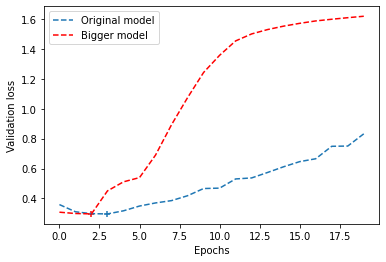

In [49]:
plt.plot(original_v_loss, '--', label='Original model')
plt.plot(bigger_v_loss, '--', label='Bigger model', color='r')

plt.scatter(np.argmin(original_v_loss), np.min(original_v_loss), marker='+')
plt.scatter(np.argmin(bigger_v_loss), np.min(bigger_v_loss), marker='+', color='r')

plt.ylabel('Validation loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()

Ex 12

In [52]:
from keras.layers import Dense
from keras import regularizers

In [55]:
l2_model= models.Sequential([
    layers.Dense(16,activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1,activation='sigmoid')])

l2_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='acc')

Ex 13

In [56]:
l2_hist = l2_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=512)

Epoch 1/20
49/49 [==============================] - 3s 47ms/step - loss: 0.8499 - acc: 0.7355 - val_loss: 0.5755 - val_acc: 0.8645
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.5343 - acc: 0.8809 - val_loss: 0.5022 - val_acc: 0.8797
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4695 - acc: 0.8961 - val_loss: 0.4769 - val_acc: 0.8778
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4375 - acc: 0.9010 - val_loss: 0.4574 - val_acc: 0.8770
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4134 - acc: 0.9025 - val_loss: 0.4374 - val_acc: 0.8819
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4030 - acc: 0.9039 - val_loss: 0.4263 - val_acc: 0.8831
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3857 - acc: 0.9050 - val_loss: 0.4466 - val_acc: 0.8645
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3748 - a

In [57]:
l2_v_loss = l2_hist.history['val_loss']
l2_train_loss = l2_hist.history['loss']


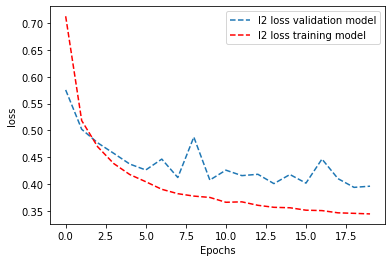

In [58]:
plt.plot(l2_v_loss, '--', label='l2 loss validation model')
plt.plot(l2_train_loss, '--', label='l2 loss training model', color='r')

plt.ylabel('loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [50]:
from keras import regularizers
# L1 regularization
regularizers . l1 (0.001)
# L1 and L2 regularization at the same time
regularizers . l1_l2 ( l1 =0.001 , l2 =0.001)


In [62]:
dpt_model= models.Sequential([
    layers.Dense(16,activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3, noise_shape=None, seed=None),
    layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2, noise_shape=None, seed=None),
    layers.Dense(1,activation='sigmoid')])

dpt_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='acc')

Ex 16


In [63]:
dpt_hist = dpt_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=512)

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.8808 - acc: 0.6677 - val_loss: 0.6149 - val_acc: 0.8596
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.6140 - acc: 0.8331 - val_loss: 0.5274 - val_acc: 0.8736
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.5366 - acc: 0.8601 - val_loss: 0.4826 - val_acc: 0.8787
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4897 - acc: 0.8752 - val_loss: 0.4601 - val_acc: 0.8783
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4549 - acc: 0.8864 - val_loss: 0.4563 - val_acc: 0.8701
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4278 - acc: 0.8887 - val_loss: 0.4261 - val_acc: 0.8804
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.4125 - acc: 0.8959 - val_loss: 0.4440 - val_acc: 0.8628
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4002 - a

ex 17

In [64]:
dpt_v_loss = dpt_hist.history['val_loss']
dpt_train_loss = dpt_hist.history['loss']


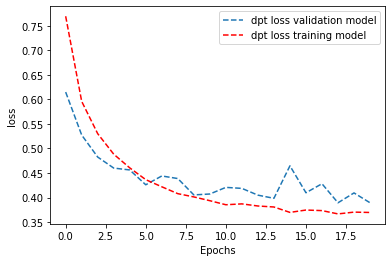

In [65]:
plt.plot(dpt_v_loss, '--', label='dpt loss validation model')
plt.plot(dpt_train_loss, '--', label='dpt loss training model', color='r')

plt.ylabel('loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()